In [1]:
!pip3 install googletrans==3.1.0a0
!pip install googletrans
!pip install VaderSentiment
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 10.7 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=df98763aa55edd3f955cb963b2ba284b655fcf9af2e1160f16f201cf3d5abbe9
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import googletrans

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
ds = pd.read_csv('clean_data_perkuliahan.csv')
ds.head()
ds.shape

(375, 1)

In [4]:
translator = Translator()
translations = {}
for column in ds.columns:
    unique_elements = ds[column].unique()
    for element in unique_elements:
        translations[element] = translator.translate(element).text
translations

{'selawat ustaz wadi anuar kuliah hengat aih nama padia': "salawat ustaz wadi anuar hot lecture aih padia's name",
 'ngira kalo polisi kuliah': 'I think the police are college students',
 'sebenernya gak kuat allah kalo kuliah pagi kuat kuliah malem nggak kuliah jam sampe jam aja': "Actually, God is not strong, if you go to college in the morning, you can study at night, you don't study until the hour",
 'yaallah kuliah pp tangsel rawamangun aje dah misuh mulu bolak dah jam': 'Ya Allah, PP Tangsel Rawamangun College has gone back and forth for hours',
 'ptn kuliah upnvj gapapa': 'ptn college upnvj is it okay',
 'hilang ambis gak pas kuliah kayak gak semangat gitu': "Lost or not when I go to college, I'm not so enthusiastic",
 'twitteplease do youmagic work it or not coba ngetweet gin adik kuliah salah univ tangerang udah sampe susun skripsi kendala laptop tuh lola dipake ketik': "twitter please do your magic work it or not try to tweet gin, my sister is in the wrong university of tange

In [5]:
ds.head()

,data
0,selawat ustaz wadi anuar kuliah hengat aih nam...
1,ngira kalo polisi kuliah
2,sebenernya gak kuat allah kalo kuliah pagi kua...
3,yaallah kuliah pp tangsel rawamangun aje dah m...
4,ptn kuliah upnvj gapapa


In [6]:
ds.replace(translations, inplace=True)
ds.head()

,data
0,salawat ustaz wadi anuar hot lecture aih padia...
1,I think the police are college students
2,"Actually, God is not strong, if you go to coll..."
3,"Ya Allah, PP Tangsel Rawamangun College has go..."
4,ptn college upnvj is it okay


In [7]:
ds.to_csv('translate_data.csv', encoding='utf8', index=False)

In [2]:
df = pd.read_csv('translate_data.csv')
df.head()

,data
0,salawat ustaz wadi anuar hot lecture aih padia...
1,I think the police are college students
2,"Actually, God is not strong, if you go to coll..."
3,"Ya Allah, PP Tangsel Rawamangun College has go..."
4,ptn college upnvj is it okay


# Proses Klasifikasi Lexicon Based

In [3]:
analyze = SentimentIntensityAnalyzer()

In [4]:
score = [analyze.polarity_scores(x) for x in df['data']]
print(score)
df['Nilai Komponen'] = [x['compound'] for x in score]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.101, 'neu': 0.821, 'pos': 0.078, 'compound': -0.1536}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263}, {'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'compound': -0.6814}, {'neg': 0.132, 'neu': 0.816, 'pos': 0.052, 'compound': -0.5423}, {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.0772}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'compound': -0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.207, 'neu': 0.646, 'pos': 0.147, 'compound': -0.4019}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.296}, {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.6808}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun

In [5]:
df

,data,Nilai Komponen
0,salawat ustaz wadi anuar hot lecture aih padia...,0.0000
1,I think the police are college students,0.0000
2,"Actually, God is not strong, if you go to coll...",-0.1536
3,"Ya Allah, PP Tangsel Rawamangun College has go...",0.0000
4,ptn college upnvj is it okay,0.2263
...,...,...
370,"being scolded at home, it's really a family co...",0.6249
371,study sasjep take committee credit,0.3818
372,Morning lectures are sleepy if afternoon class...,0.0000
373,cm studying abroad and then living like I'm ti...,-0.6369


In [11]:
df.loc[df['Nilai Komponen'] < 0, 'Sentiments'] = 'Negatif'
df.loc[df['Nilai Komponen'] == 0, 'Sentiments'] = 'Netral'
df.loc[df['Nilai Komponen'] > 0, 'Sentiments'] = 'Positif'
df.head()

,data,Nilai Komponen,Sentiments
0,salawat ustaz wadi anuar hot lecture aih padia...,0.0000,Netral
1,I think the police are college students,0.0000,Netral
2,"Actually, God is not strong, if you go to coll...",-0.1536,Negatif
3,"Ya Allah, PP Tangsel Rawamangun College has go...",0.0000,Netral
4,ptn college upnvj is it okay,0.2263,Positif


In [8]:
df.to_csv('hasil_komponen_sentimen.csv', encoding='utf8', index=False)

In [10]:
ds= pd.read_csv('hasil_komponen_sentimen.csv')
ds.head()

,data,Nilai Komponen,Sentiments
0,salawat ustaz wadi anuar hot lecture aih padia...,0.0000,Netral
1,I think the police are college students,0.0000,Netral
2,"Actually, God is not strong, if you go to coll...",-0.1536,Negatif
3,"Ya Allah, PP Tangsel Rawamangun College has go...",0.0000,Netral
4,ptn college upnvj is it okay,0.2263,Positif


In [12]:
len_sentiments = pd.value_counts(df['Sentiments'])
len_sentiments

Positif    149
Netral     123
Negatif    103
Name: Sentiments, dtype: int64

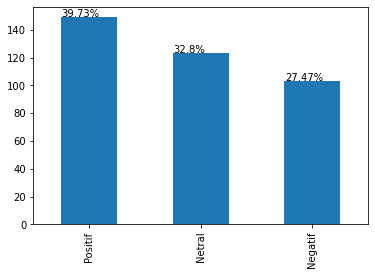

In [15]:
ax = len_sentiments.plot.bar()
n = len(df.index)
n
for i in ax.patches:
    ax.annotate(str(round(i.get_height() / n*100,2)) + '%', (i.get_x()*1.005, i.get_height() * 1.005))
plt.savefig('plot.png', dpi=500, bbox_inches='tight')

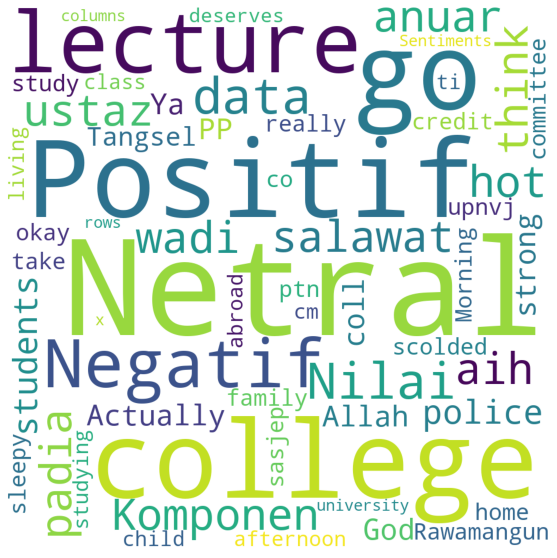

<Figure size 432x288 with 0 Axes>

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width = 1000, height = 1000,
                     background_color = 'white', max_words = 500,
                     min_font_size = 20).generate(str(ds))

fig = plt.figure(figsize = (10,10), facecolor = "white")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

plt.savefig('all_wordcloud.jpg', dpi=800)

In [47]:
def allwordcloud(all_words):
    global WordCloud
    wordcloud = WordCloud(width=800, height=800,
                         random_state=0, max_font_size=100, background_color = 'black',
                          colormap='Pastel1').generate(all_words)
    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis('off')
    plt.show()

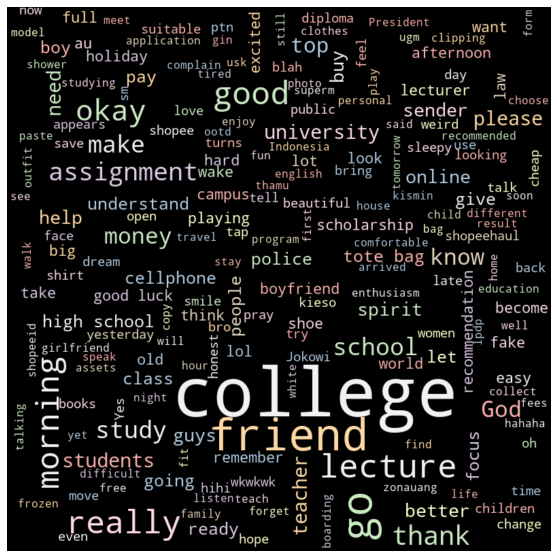

In [49]:
all_words = ' '.join([text for text in ds['data'][ds.Sentiments == 'Positif']])
allwordcloud(all_words)
plt.show()


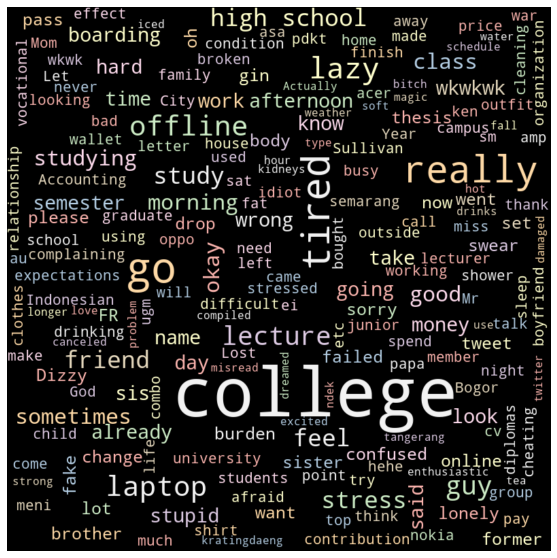

In [50]:
all_words = ' '.join([text for text in ds['data'][ds.Sentiments == 'Negatif']])
allwordcloud(all_words)
plt.show()
